In [12]:
import data
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
Data = data.get_csv()
IDs = Data['author_id'].tolist() 

In [4]:
Data.keys()

Index(['author_id', 'readability', 'TTR', 'max_similar', 'min_similar',
       'mean_similar', 'number_identical', 'mcts_ner', 'mcts_adj', 'url_max',
       'url_mean', 'hashtag_max', 'hashtag_mean', 'user_max', 'user_mean',
       'emoji_mean', 'emoji_max', 'exclamation_mean', 'exclamation_max',
       'period_mean', 'period_max', 'question_mean', 'question_max',
       'comma_mean', 'comma_max', 'allcaps_ratio', 'allcaps_inclusion_ratio',
       'titlecase_ratio', 'mean_words', 'retweet_percentage', 'ADJ', 'ADP',
       'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART',
       'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'TOKEN',
       'truth'],
      dtype='object')

In [20]:
uncorr_features = ["number_identical", "comma_mean", "retweet_percentage", "ADV", "TOKEN"]

#increases accuracy a bit better

In [ ]:
uncorr_features = ["number_identical",'min_similar','TTR','number_identical', 'hashtag_mean', 'exclamation_max',
       'period_mean', 'period_max', 'question_mean', 'question_max', "comma_mean", "comma_max", "allcaps_ratio", "mean_words", "retweet_percentage", "INTJ", "CONJ", "ADP", "ADJ", "ADV", "PRON", "NUM", "SCONJ", "SYM", "X", "TOKEN"]

In [21]:
table = Data.drop(uncorr_features,axis=1)
table = table.drop('author_id', axis=1).to_numpy()
X = table[:,:-1]
y = table[:,-1]

In [25]:
kf = StratifiedKFold(n_splits=5)
for train_index, test_index in kf.split(X,y):
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    model = XGBClassifier()
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = balanced_accuracy_score(ytest, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%
Accuracy: 66.67%
Accuracy: 60.00%
Accuracy: 70.00%
Accuracy: 68.33%


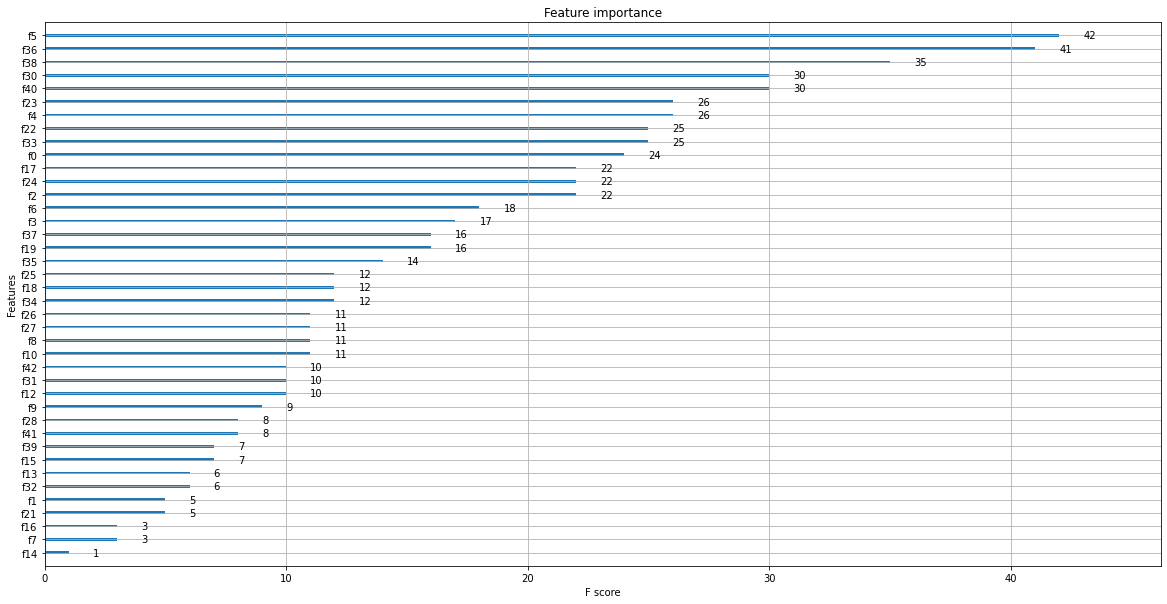

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plot_importance(model)
plt.show()

In [29]:
features = Data.keys()[1:]

In [42]:
features[41]

'PROPN'